# Lab 2: Electron Diffraction Lab #


### Exit app mode: ###
To get started, you first need to exit "Appmode" in your nanoHUB Jupyter Notebook session. 
This will allow you view and modify the Python source code that the Jupyter Notebook runs. <br><br>

## Import Libraries ##

#### 1. Import libraries in the cell below. ####
Import the `numpy` library as `np` and the `matplotlib.pyplot` library as `plt`. 

In [1]:
# This line tells Python to use the NumPy library
# *** write code here to import numpy as np

# All of our plotting commands will now start with `plt`. 
# *** write code here to import matplotlib.pyplot as plt

# We'll also change the default font size to make our plots more readable.
plt.rc('font', size=16) 
print("Libraries imported.")

SyntaxError: invalid syntax (<ipython-input-1-2f13247e0691>, line 2)

## Part 1: Setting Up the Electron Diffraction Tube ##
Warning. Be careful with the high voltage supply. Do not turn on the high voltage power suply unless the voltage is turned all the way down and all the connections are correct.

- **Make sure the power supply is correctly connected to the electron diffraction tube. Follow the diagram below.**
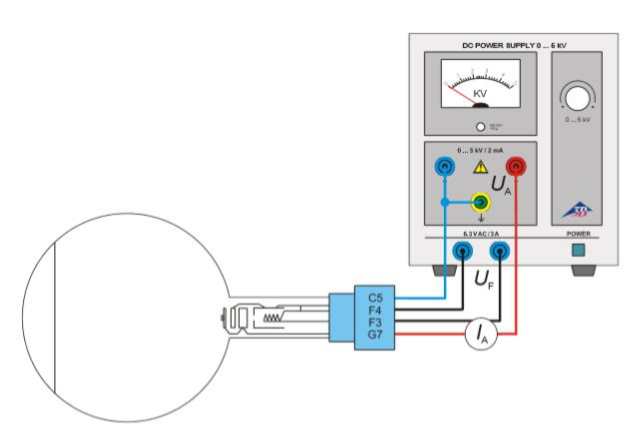

- F4 and F3 are low voltage (6.3VAC) and connected to the pure tungsten heater filament. The filament ejects electrons when it heats up.
-  G7 and C5 are connected to the cathode and anode. A large voltage difference accelerates the electrons to the graphite foil.

- **Make sure voltage is turned all the way down (CCW). Turn on the power. Tune the voltage over the whole range to observe the rings.**

How do we know that these rings are coming from electrons, and not something else like xrays? According to electromagnetic theory, a particle with a charge 𝑞 moving with velocity 𝒗 in a magnetic field 𝑩 experiences a force 𝑭 = 𝑞 (𝒗 × 𝑩) that deflects the path. But light is unaffected by a magnetic field. There is a magnet nearby the apparatus. Place the magnetic
near the apparatus. Are we dealing with light or electrons?

Before being quantitative, we are first going to see if what we observe agrees qualitatively with de Broglie’s prediction. According to de Broglie’s predidctions, should the ring
diameter increase or decrease with the voltage?


## Part 2: Calculating the electron wavelength with de Broglie's hypothesis ##

We are going to calculate the wavelength of a 5keV electron using de Broglie’s hypothesis. One of the challenges of this lab is going to be all the different units and making sure you convert to SI units before calculating something. In this part, you will learn some tricks to make units much easier. We are going to define every variabe in Jupyter in SI units, which for length is meters, and energy is Joules. 

- **Run the code below to define units and constants.** 



In [11]:
# Constants
h = 6.626e-34 # Planck's constant (kg * m^2/s)
hbar = h/(2*np.pi) # Reduced Planck's constant
electron_mass = 9.109e-31 # kg
c = 299792458 # m/s, Speed of light

# Energies
eV = 1.602e-19 # 1 electron volt in Joules
keV = 1000*eV # 1 keV in Joules

# Distances
mm = 1e-3 # millimeter
um = 1e-6 # micrometer
nm = 1e-9 # nanometer
pm = 1e-12 # picometer

When you are taking data and performing analysis, you will often want to input or print/plot values in terms of more convenient units, such as keV for energy or mm or pm for length.  Here you will see how to make your life easier by using the constants and units you just defined and always keeping your python variables defined in terms of SI units.

**An electron has an energy of 5 keV.   Define `energy = 5*keV`, and print the result with  `print("Energy: ", energy)`.  Note that the variable `energy` is actually in the SI units Joules because you above defined `keV` as 1 keV in Joules.**

**Now print the variable energy but in units eV by just typing `print("Energy in eV: ", energy/eV)`.**

- **Calculate the wavelength of a 5keV electron using the de Broglie relation $\lambda = \frac{h}{\sqrt{2 m E}}$.  Here $m$ is the electron mass, and $h$ is Planck's constant, which you defined above already.  Print the wavelength in the units of picometers.**  
Check with the TA to see if this is correct, because the rest of the lab will depend on this.



In [16]:
energy = 5*keV # energy is not in units Joules because the variable "keV' is in 1 keV in Joles
wavelength = h/np.sqrt(2*electron_mass*energy)
print("Wavelength (pm):", wavelength/pm) # Print wavelength in picomoeters

Wavelength (pm): 17.345420174629407


 ## Part 3: Testing de Broglie's prediction at a single voltage ##

- **Now we will measure the diameters of the two rings to test de Broglie’s predictions at one specific voltage. Go to a voltage of 5.00kV. Measure the diameters of the two rings with the
caliper and set them as new variables diameter1, diameter2.**

- **Define the lattice constants `𝑑11 = 123*pm`, `𝑑10 = 213*pm`.  Define the distance between the graphite target and screen as `L = 125*mm`. Use them to convert these two diameters to Bragg wavelengths `lambda_bragg` of the electron.**

HINT: You will have to figure out which lattice constant corresponds to which ring. The two wavelengths should be similar if you chose correctly. 

HINT:  The input and output of sinusoidal functions must always be radians in Python, **NOT** degrees. The output of arctan is radians. To convert radians to degrees, multiply by 180/𝜋. Call $\arctan()$ with `np.arctan()`.

- **Use de Broglie’s hypothesis $\lambda = h/p $ to calculate the expected electron wavelength at 5kV, lambda_electron .**

HINT: an electron accelerated between two electrodes with a voltage difference of 1kV has an energy of 1keV = 1000 eV.

- **In order to be quantitative about the agreement of the model and your measurement, we will need to use uncertainity analysis. Estimate an uncertainty for your ring diameter measurments, $\sigma_D$. Now convert this into an uncertainty $\sigma_\lambda$ for the Bragg wavelength $\lambda_{\text{Bragg}}$.**

The standard way to do this is error propagation, but all the derivatives can be cubersome. 

- **Start a text cell for this discussion. How close is the Bragg wavelength and the theoretical electron wavelength? Do they agree within the uncertainity of the measured Bragg wavelength? If they are more than 50% different, then you likely have a bug in your code or problems with units. If the two values are not within the uncertainity, can you think of other uncertainities in the measurement besides the diameter measurment?**

## Part 4: Measuring Planck's constant ##
We will now assume that de Broglie’s hypothesis is true, but that we do not know the value of Planck’s constant. In this part of the lab, you will measure the larger ring diameter for multiple voltages and then fit the curve with de Broglie’s model to extract a value for Planck’s constant.

- **Before curve fitting, we are going to learn how to define a function in Python. We will use this function for the fitting. Define a function deBroglie(E, h) for $\lambda = \frac{h}{\sqrt{2 m E}}$.  The function should return  wavelength in meters and have an in (meters) and have $h$ as an input argument.** 

We are pretending that we do not know the actual value of Planck’s constant. We will later use this function in the curve fitting,
where the computer will find the value of h_fit that best fits your data.

In [19]:
def deBroglie(E,h):
    # *** type code here ***
    return wavelength

print("de Broglie wavelength in pm: ", deBroglie(5*keV, h)/pm)

de Broglie wavelength in pm:  17.345420174629407


- **Measure the diameter of the larger ring for at least 5 voltages and record values in variables `voltage = np.array([...])` and `diameter = np.array([...])`.**


- **Plot the diameter vs energy. As always, label your axes.**

- **Convert the diameters into Bragg angles in a new variable called `theta_bragg` in units radians. Use the Bragg angles to calculate the Bragg wavelengths `lambda_Bragg`. Make a plot of of  `lambda_Bragg` in units picometers versus energy in units keV. Label the axes.**


You just plotted the measured electron wavelength $\lambda_\text{Bragg}$ as a function of electron energy $E$. Let us assume that we do not know Planck’s constant ℎ. In this next part, we are going to compare your data to de Broglie’s hypothesis $\lambda = \frac{h}{\sqrt{2mE}}$ with the data and find the value of $ℎ$ that best fits the data.

- Read Section 9 on “Fitting Data” in the python tutorial for help in fitting. For the fitting, you
will use the function deBroglie(E, hfit) that you defined above. That function should still be defined, or you can define it again in a new cell. You will need to tell the computer what to use as the starting guess for hfit. Try `p0 =[1e-34]` for the first guess. Print the fitted value for Planck’s constant.
<br>
Hint: If your fitted value of ℎ is more than $50\%$ different than the actual value, then you probably have a bug in your code. If your code is just outputing your guess, then the fit is not working. Check the units of your data. They should be in Joules and meters.

- **Start a text cell. Write your value of Planck’s constant and your fractional error |ℎ𝑓𝑖𝑡𝑡𝑒𝑑 − ℎ𝑎𝑐𝑡𝑢𝑎𝑙|/ℎ𝑎𝑐𝑡𝑢𝑎𝑙? Do you think this is reasonable based on the precision of your measurements?**
<br><br>

Congratulations! If you did this experiment before 1927, you would have won a Nobel prize. The 1937 Nobel prize in physics was awarded to Davisson and Thomson for “their
experimental discovery of the diffraction of electrons by crystals.”

## Part 5: Postlab

Based on your observations, answer the following questions. Type your answers directly into the text cells following each question. (If instead of a text box you seen a statement like "Type Markdown and LaTeX:  $\alpha^2$", just double click on that text to open the text box.) These are *Markdown* cells, i.e., they accept text input using the Markdown text-formatting language. Markdown allows you to produce nicely-formatted text. For example: 
* Text enclosed in a single pair of asterisks `*like this*` will be formatted in italics. 
* Text enclosed in a double pair of asterisks `**like this**` will be formatted in bold. 
* Text enclosed in dollar signs `$like this$` will be interpreted as a mathematical equation using LaTex syntax. 

When you are finished with your answer, type <Shift+Enter> to convert your input into formatted text. If you want to modify your input, just double-click on it to re-enter text entry mode. 



- **What if you repeated this experiment, but instead of using electrons you used X-rays that have the same wavelength? Do you expect to see the same size rings? One reason that it is easier to use X-rays is that you do not need to do it in vacuum.**

-  **Consider a 5 kg bowling ball traveling at 5 m/s. Calculate the wavelength of the bowling ball? Why do you not observe interference of the ball from the pins? The size of a nucleus is 1e-15 meters. There is a reason we don’t see quantum effects in our everyday life.**

- **We have measured the wave-like properties of an electron. However, what if we performed a double-slit experiment with electrons, but this time we only accelerating a single electron at a time. Instead of the fluorescent screen, we use a sensitive detector that can detect one electron at a time. Each time an electron arrives, you hear a click and see where it landed on the screen. If you took enough data, would you still observe an interference pattern shown below?**

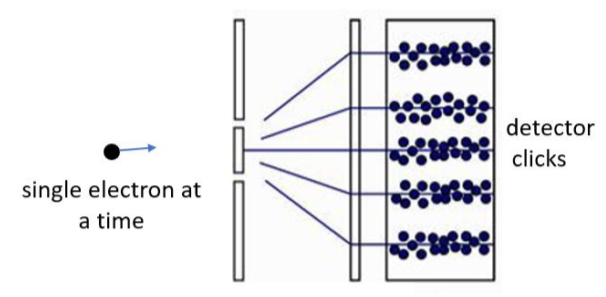

HINT: This is tricky. I encourage you guys to talk to each other and the TA. This question really gets to heart of why quantum mechanics is so weird.

### 10. Submit! 

Finally, when you're satisfied with your answers, download your notebook as a PDF by selecting File > Print Preview from the dropdown menu at the top right of this window. (See screen shot below.) Then print the new window as a PDF, and save it under the Lab1 assignment on the Brightspace page **for your lab section**. <br>

Note: There are separate Brightspace pages for your lab section and for the Monday lecture. You will submit your PDF notebooks on your lab Brightspace page, **not** the Monday lecture page. 

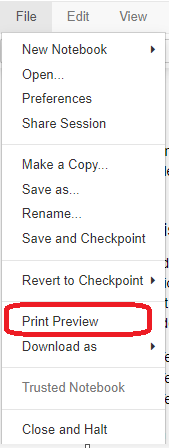